In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.ar_model import AutoReg
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
# Assume data is sequential (e.g., monthly observations)
data['time_index'] = np.arange(len(data))

# Use the 'price' column as the time series target
data['price'] = pd.to_numeric(data['price'], errors='coerce')
data.dropna(subset=['price'], inplace=True)

In [4]:
# Exponential Smoothing Model
exp_model = ExponentialSmoothing(data['price'], seasonal=None, trend=None, damped_trend=False).fit(smoothing_level=0.5)

In [5]:
# Predict future values
exp_forecast = exp_model.forecast(steps=12)

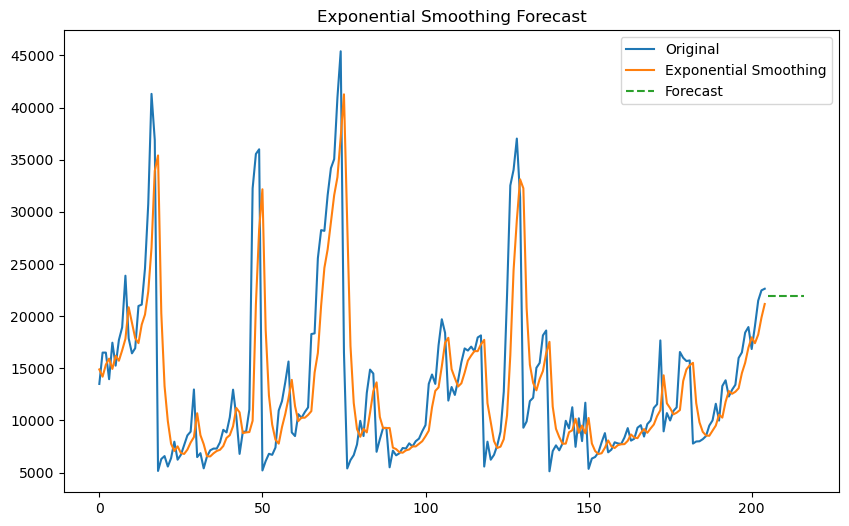

In [6]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data['time_index'], data['price'], label='Original')
plt.plot(data['time_index'], exp_model.fittedvalues, label='Exponential Smoothing')
plt.plot(range(len(data), len(data) + 12), exp_forecast, label='Forecast', linestyle='--')
plt.legend()
plt.title('Exponential Smoothing Forecast')
plt.show()

In [7]:
# Linear Trend Model
# Fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(data[['time_index']], data['price'])

LinearRegression()

In [8]:
# Predict values using the model
data['linear_trend'] = linear_model.predict(data[['time_index']])

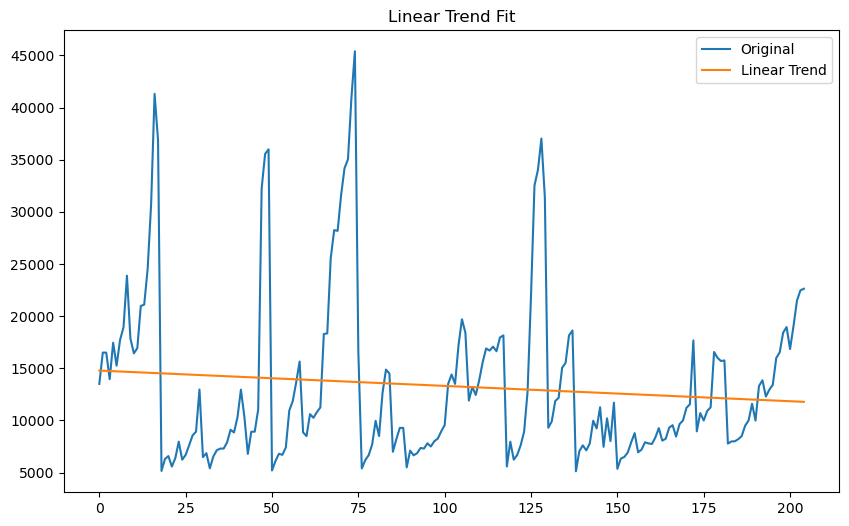

In [9]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data['time_index'], data['price'], label='Original')
plt.plot(data['time_index'], data['linear_trend'], label='Linear Trend')
plt.legend()
plt.title('Linear Trend Fit')
plt.show()

In [10]:
# Autoregressive Model (AR)
# Fit the AR model with a specified lag
ar_model = AutoReg(data['price'], lags=5).fit()

In [11]:
# Predict future values using the AR model
ar_forecast = ar_model.predict(start=len(data), end=len(data) + 11)

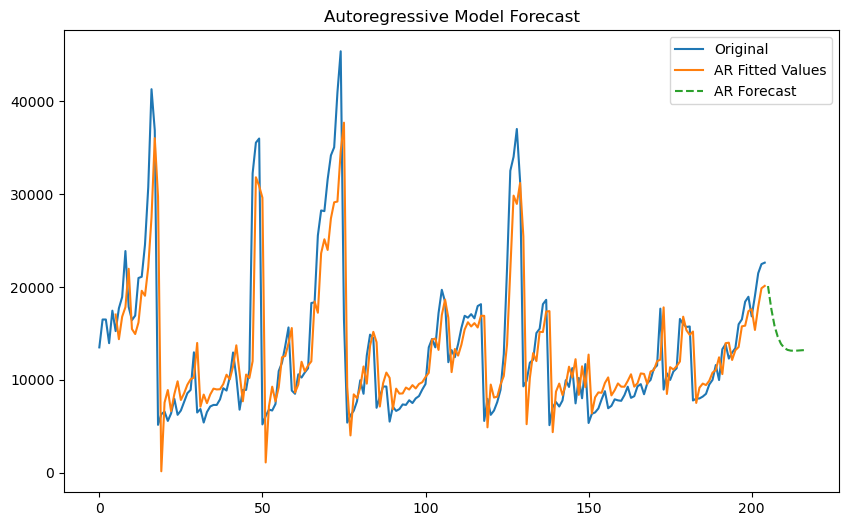

In [12]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data['time_index'], data['price'], label='Original')
plt.plot(ar_model.fittedvalues.index, ar_model.fittedvalues, label='AR Fitted Values')
plt.plot(range(len(data), len(data) + 12), ar_forecast, label='AR Forecast', linestyle='--')
plt.legend()
plt.title('Autoregressive Model Forecast')
plt.show()
